<a href="https://colab.research.google.com/github/india6317/1/blob/main/Copy_of_Loryal_Paris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Now you should be able to access files in your Drive using the correct path
df = pd.read_csv('ecomm_sales_data.csv')
print(df.describe())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
                MRP      Discount           CLP   Impressions        Clicks  \
count  19980.000000  19980.000000  19980.000000  19980.000000  19980.000000   
mean     634.942342      0.148198    541.451582   5657.151151    252.748298   
std      297.209526      0.098100    262.879473   3610.895641    211.180071   
min      300.000000      0.000000    210.000000     70.000000      1.000000   
25%      499.000000      0.050000    349.300000   2667.000000     90.000000   
50%      560.000000      0.150000    476.000000   5265.000000    194.000000   
75%      649.000000      0.250000    616.550000   8175.250000    362.000000   
max     1149.000000      0.300000   1149.000000  15000.000000   1185.000000   

              Spend  Quantity Sold  Competitor MRP  Competitor Discount  \
count  19980.000000   19980.000000    19980.000000         19980.000000   
mean    1

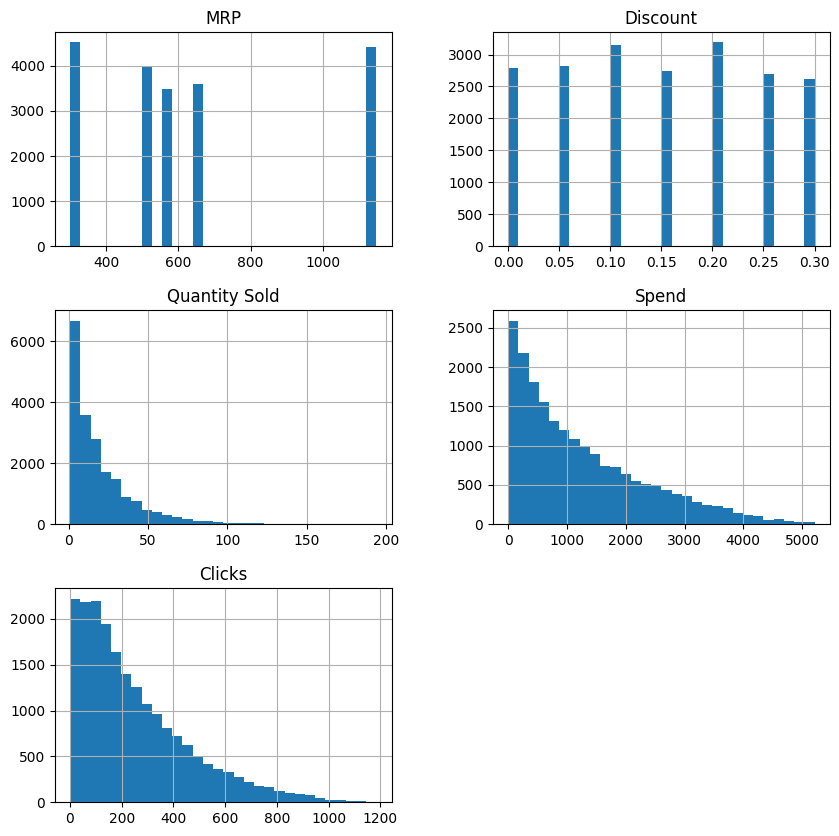

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


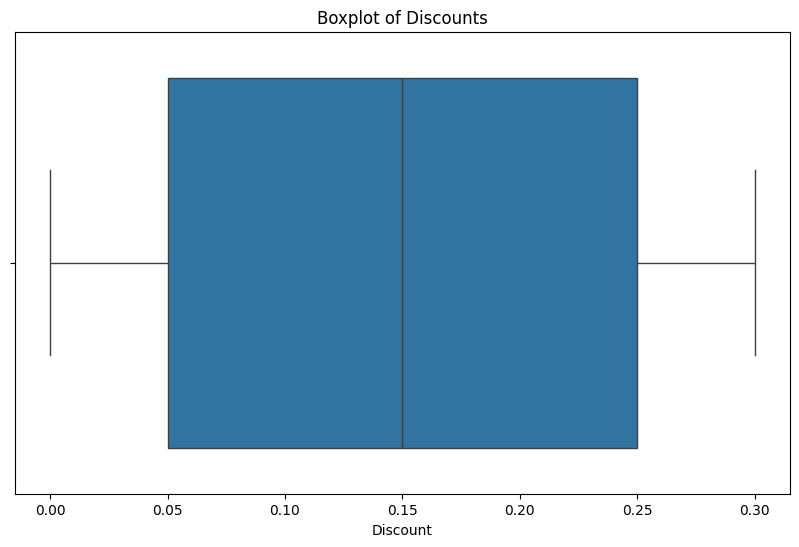

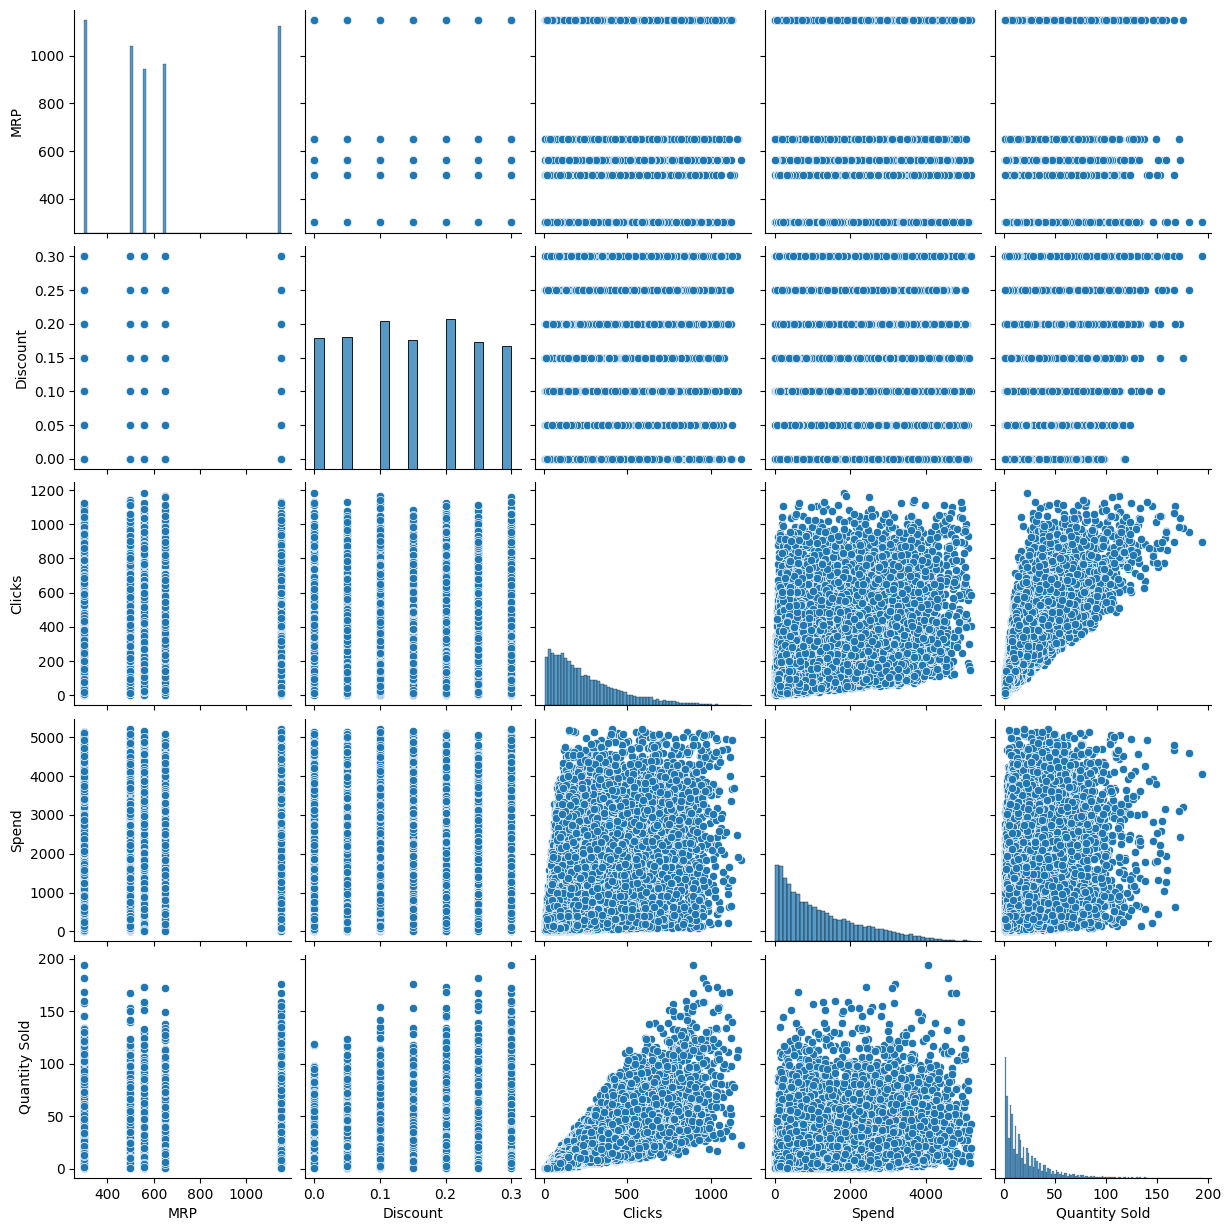

Empty DataFrame
Columns: [Product, Date, MRP, Discount, CLP, Platform, City, City Tier, Impressions, Clicks, Spend, Quantity Sold, Competitor, Competitor MRP, Competitor Discount, Competitor Price, zscore_discount]
Index: []
Empty DataFrame
Columns: [Product, Date, MRP, Discount, CLP, Platform, City, City Tier, Impressions, Clicks, Spend, Quantity Sold, Competitor, Competitor MRP, Competitor Discount, Competitor Price, zscore_discount, zscore_MRP]
Index: []
        Product       Date  MRP  Discount     CLP  Platform        City  \
269      Cream   4/14/2024  560      0.00  560.00  Flipkart    Srinagar   
281      Cream   4/15/2024  560      0.15  476.00    Amazon   Hyderabad   
389      Cream   4/20/2024  560      0.20  448.00     Nykaa      Mumbai   
489      Cream   4/26/2024  560      0.20  448.00  Flipkart   Allahabad   
529      Cream   4/28/2024  560      0.15  476.00  Flipkart      Mumbai   
...         ...        ...  ...       ...     ...       ...         ...   
19180  SkinCa

In [ ]:

# Visualize distribution of key numeric variables
numeric_columns = ['MRP', 'Discount', 'Quantity Sold', 'Spend', 'Clicks']
df[numeric_columns].hist(bins=30, figsize=(10, 10))
plt.show()

# Boxplots to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Discount'])
plt.title('Boxplot of Discounts')
plt.show()

# Pair plot to visualize relationships between variables
sns.pairplot(df[['MRP', 'Discount', 'Clicks', 'Spend', 'Quantity Sold']])
plt.show()

# Check for outliers using Z-score
from scipy.stats import zscore
df['zscore_discount'] = zscore(df['Discount'])
outliers = df[df['zscore_discount'].abs() > 3]  # Values with Z > 3
print(outliers)


df['zscore_MRP'] = zscore(df['MRP'])
outliers = df[df['zscore_MRP'].abs() > 3]  # Values with Z > 3
print(outliers)

df['zscore_Spend'] = zscore(df['Spend'])
outliers = df[df['zscore_Spend'].abs() > 3]  # Values with Z > 3
print(outliers)

df['zscore_Spend'] = zscore(df['Spend'])
outliers = df[df['zscore_Spend'].abs() > 3]  # Values with Z > 3
print(outliers)

df['zscore_Quantity Sold'] = zscore(df['Quantity Sold'])
outliers = df[df['zscore_Quantity Sold'].abs() > 3]  # Values with Z > 3
print(outliers)

df['zscore_Clicks'] = zscore(df['Clicks'])
outliers = df[df['zscore_Clicks'].abs() > 3]  # Values with Z > 3
print(outliers)

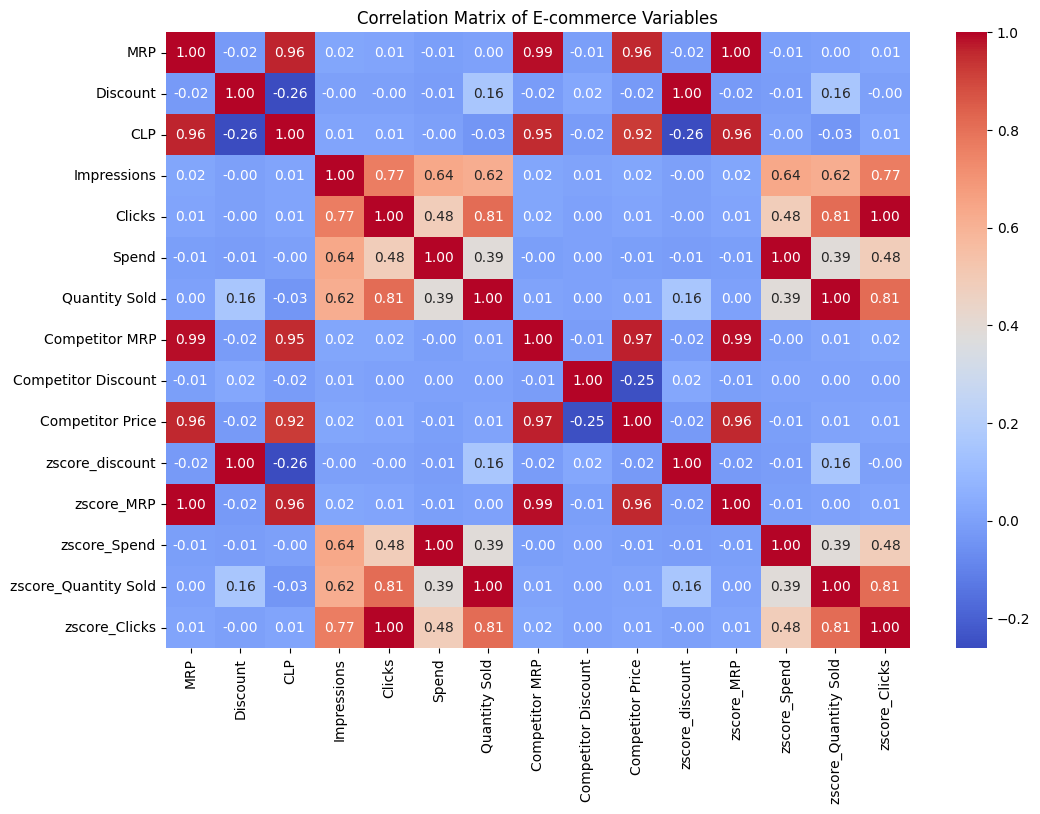

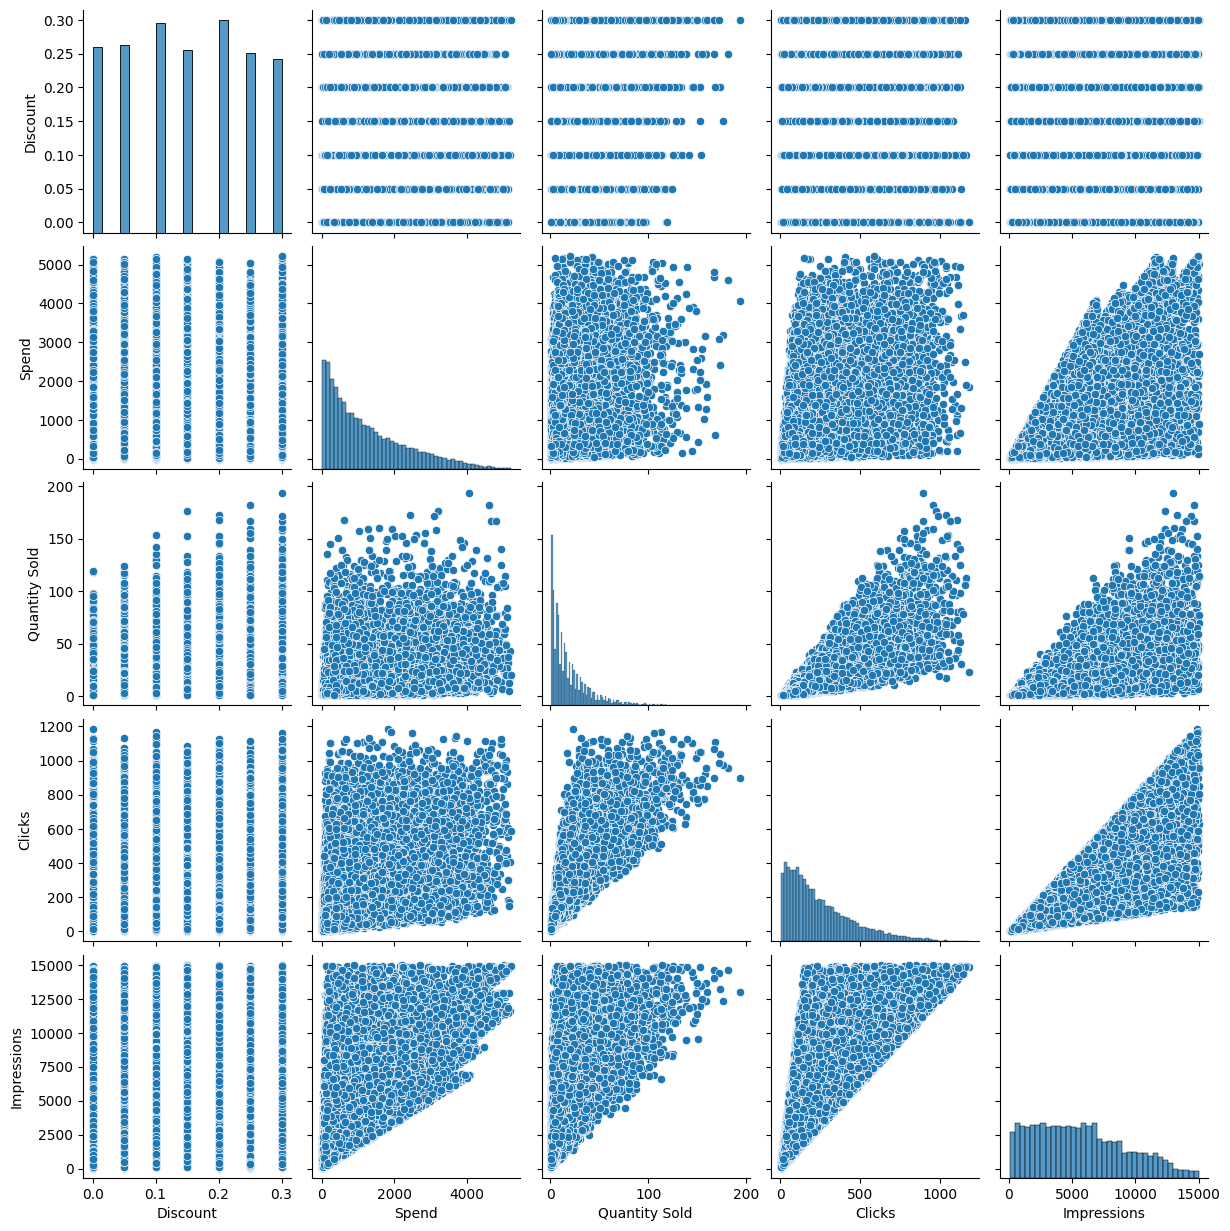

Features highly correlated with 'Quantity Sold': Index(['Impressions', 'Clicks', 'Quantity Sold', 'zscore_Quantity Sold',
       'zscore_Clicks'],
      dtype='object')


In [ ]:
df['Product'] = df['Product'].astype('category')

# Calculate the correlation matrix (excluding non-numeric columns)
correlation_matrix = df.corr(numeric_only=True)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of E-commerce Variables')
plt.show()

# Pairplot for bivariate relationships between numerical columns
sns.pairplot(df[['Discount', 'Spend', 'Quantity Sold', 'Clicks', 'Impressions']])
plt.show()

# Insights from the correlation matrix
high_corr_features = correlation_matrix[abs(correlation_matrix['Quantity Sold']) > 0.5].index
print("Features highly correlated with 'Quantity Sold':", high_corr_features)

R-squared: 0.6670319031651188
Mean Absolute Error: 8.00010108438452
Root Mean Squared Error: 12.35754248498883


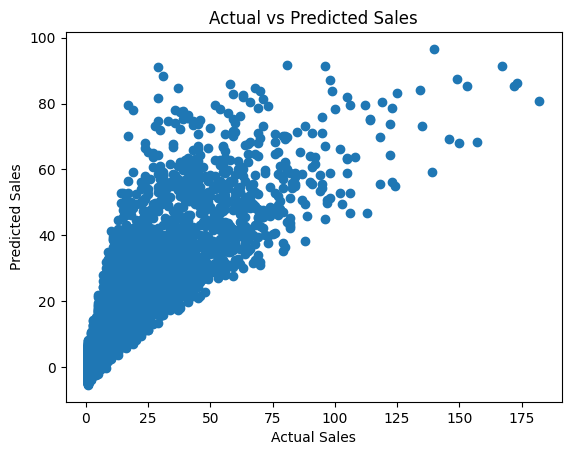

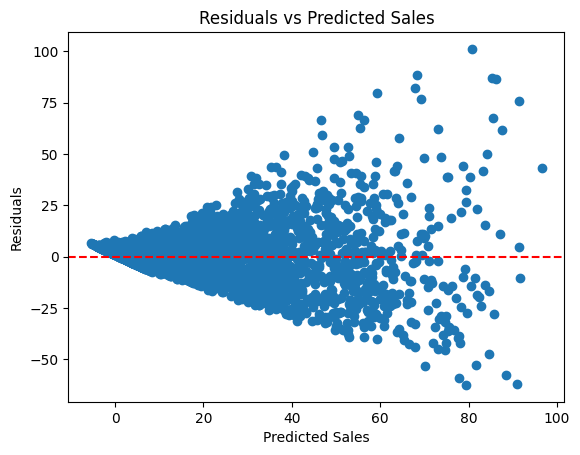

    feature       VIF
0       MRP  2.923979
1  Discount  2.468030
2    Clicks  3.028342
3     Spend  2.900792
{'Optimal Discount': 0.3, 'Platform Performance': Platform
Amazon      112537
Flipkart     93086
Myntra       62261
Nykaa        81751
Purplle      50711
Name: Quantity Sold, dtype: int64, 'City Tier Performance': City Tier
Tier 1     97730
Tier 2    155147
Tier 3    147469
Name: Quantity Sold, dtype: int64}
    feature       VIF
0       MRP  2.923979
1  Discount  2.468030
2    Clicks  3.028342
3     Spend  2.900792


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

# Select features for prediction (based on EDA)
X = df[['MRP', 'Discount', 'Clicks', 'Spend']]  # Independent variables
y = df['Quantity Sold']  # Dependent variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features if necessary
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print("R-squared:", r2_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))

# Checking assumptions (Linearity)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()

# Residual plot to check homoscedasticity
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Sales")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Sales")
plt.show()

# Check for multicollinearity using Variance Inflation Factor (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)
# Export key insights and data
insights = {
    'Optimal Discount': df.groupby('Discount')['Quantity Sold'].mean().idxmax(),
    'Platform Performance': df.groupby('Platform')['Quantity Sold'].sum(),
    'City Tier Performance': df.groupby('City Tier')['Quantity Sold'].sum()
}

# Print out or export key insights
print(insights)

# Save key results to a CSV (to be included in the presentation)
df[['Discount', 'Quantity Sold', 'Platform', 'City Tier']].to_csv('key_results.csv', index=False)
print(vif_data)
prin







In [ ]:
insights = {
    'Optimal Discount': df.groupby('Discount')['Quantity Sold'].mean().idxmax(),
    'Platform Performance': df.groupby('Platform')['Quantity Sold'].sum(),
    'City Tier Performance': df.groupby('City Tier')['Quantity Sold'].sum()
}

# Print out or export key insights
print(insights)

# Save key results to a CSV (to be included in the presentation)
df[['Discount', 'Quantity Sold', 'Platform', 'City Tier']].to_csv('key_results.csv', index=False)

{'Optimal Discount': 0.3, 'Platform Performance': Platform
Amazon      112537
Flipkart     93086
Myntra       62261
Nykaa        81751
Purplle      50711
Name: Quantity Sold, dtype: int64, 'City Tier Performance': City Tier
Tier 1     97730
Tier 2    155147
Tier 3    147469
Name: Quantity Sold, dtype: int64}


                            OLS Regression Results                            
Dep. Variable:          Quantity Sold   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     8574.
Date:                Mon, 07 Oct 2024   Prob (F-statistic):               0.00
Time:                        17:06:09   Log-Likelihood:                -62309.
No. Observations:               15984   AIC:                         1.246e+05
Df Residuals:                   15979   BIC:                         1.247e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.0729      0.094    212.648      0.0

<ipython-input-14-fed91c22d7b1>:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  equation = f"Quantity Sold = {coefficients[0]:.2f} + {coefficients[1]:.2f}*MRP + {coefficients[2]:.2f}*Discount + {coefficients[3]:.2f}*Clicks + {coefficients[4]:.2f}*Spend"


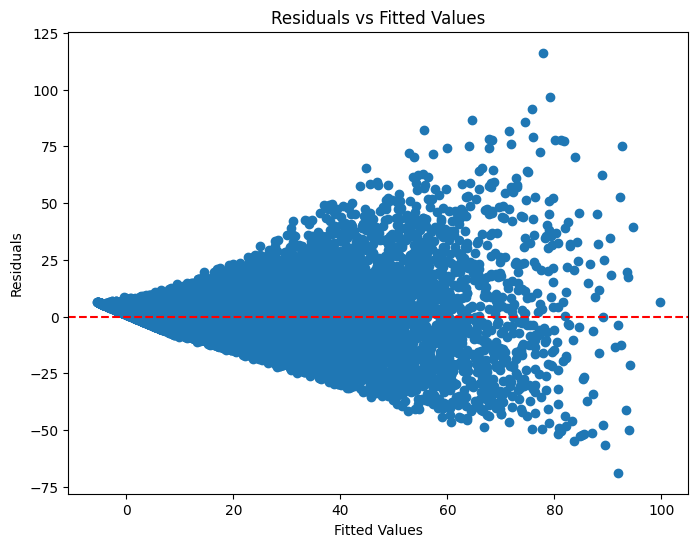

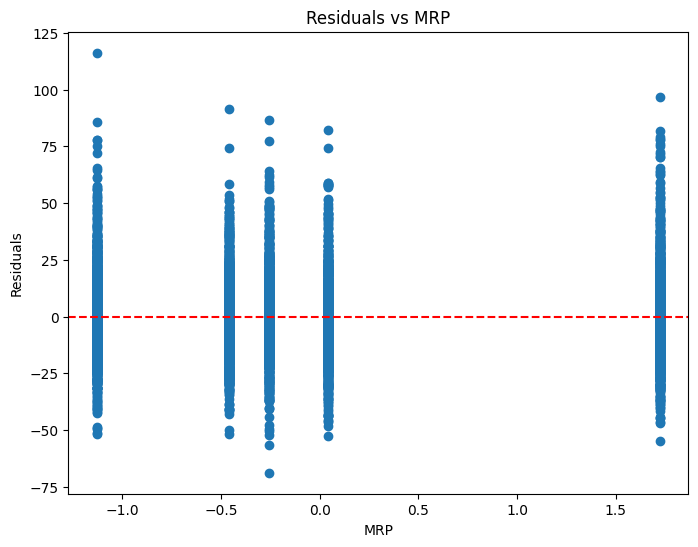

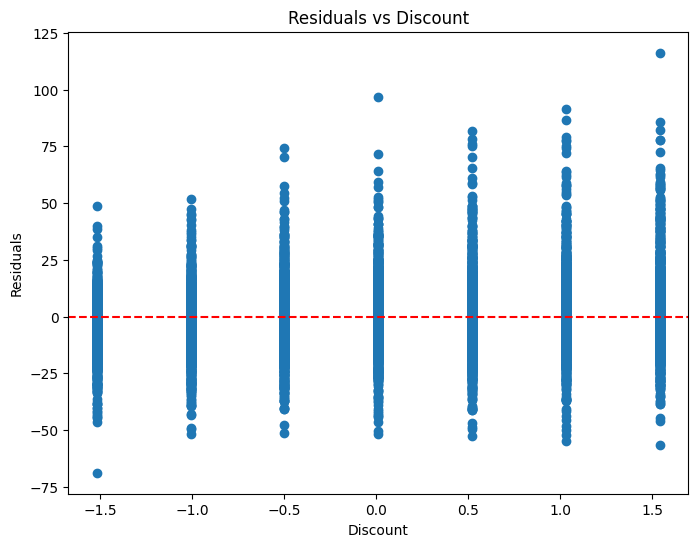

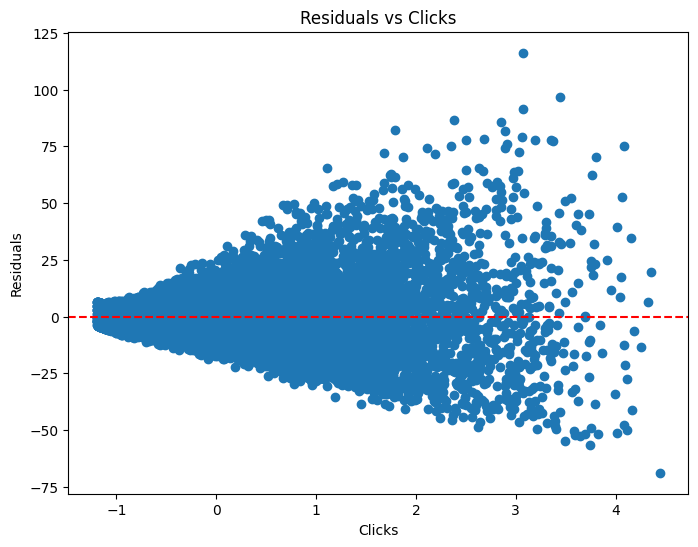

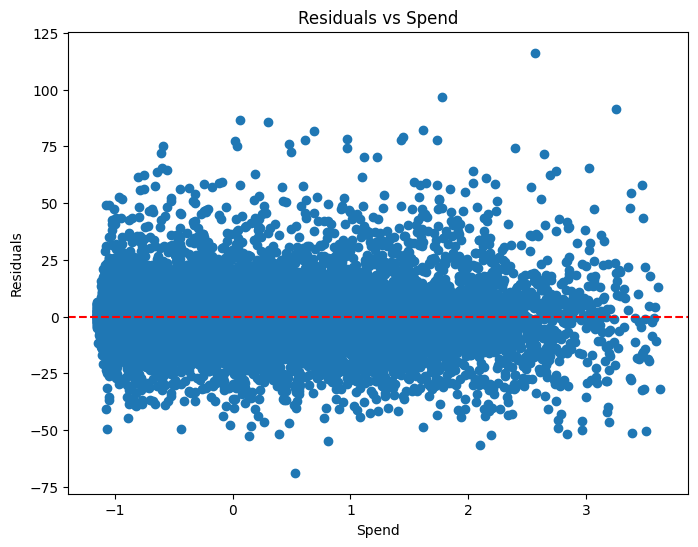

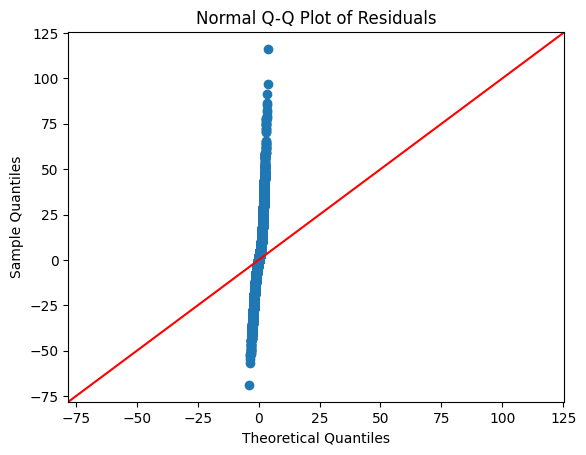

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Prepare the data
X = df[['MRP', 'Discount', 'Clicks', 'Spend']]
y = df['Quantity Sold']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add constant (intercept) for the model
X_train_scaled_with_const = sm.add_constant(X_train_scaled)

# Fit the regression model using statsmodels for adjusted R-squared and residual analysis
model = sm.OLS(y_train, X_train_scaled_with_const).fit()

# Print the model summary to display adjusted R-squared and coefficients
print(model.summary())

# Predicted values
y_pred = model.predict(sm.add_constant(X_test_scaled))

# Calculate adjusted R-squared manually for the test set
r_squared = r2_score(y_test, y_pred)
n = len(y_test)
p = X_test.shape[1]
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)
print(f'Adjusted R-squared on test set: {adjusted_r_squared}')

# Model equation
coefficients = model.params
equation = f"Quantity Sold = {coefficients[0]:.2f} + {coefficients[1]:.2f}*MRP + {coefficients[2]:.2f}*Discount + {coefficients[3]:.2f}*Clicks + {coefficients[4]:.2f}*Spend"
print("Model Equation:", equation)

# Residuals
residuals = y_train - model.predict(X_train_scaled_with_const)

# Residual vs Fitted values plot
plt.figure(figsize=(8, 6))
plt.scatter(model.fittedvalues, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.show()

# Residuals vs each predictor
for i, col in enumerate(X.columns):
    plt.figure(figsize=(8, 6))
    plt.scatter(X_train_scaled[:, i], residuals)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel(col)
    plt.ylabel("Residuals")
    plt.title(f"Residuals vs {col}")
    plt.show()

# Normal Q-Q plot of residuals
sm.qqplot(residuals, line='45')
plt.title("Normal Q-Q Plot of Residuals")
plt.show()